# Question 1

In [92]:
# Import Essential Libraries
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [93]:
# Read train.csv
houseData = pd.read_csv('train.csv')

In [94]:
# Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [95]:
# Check the individual statistical description
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


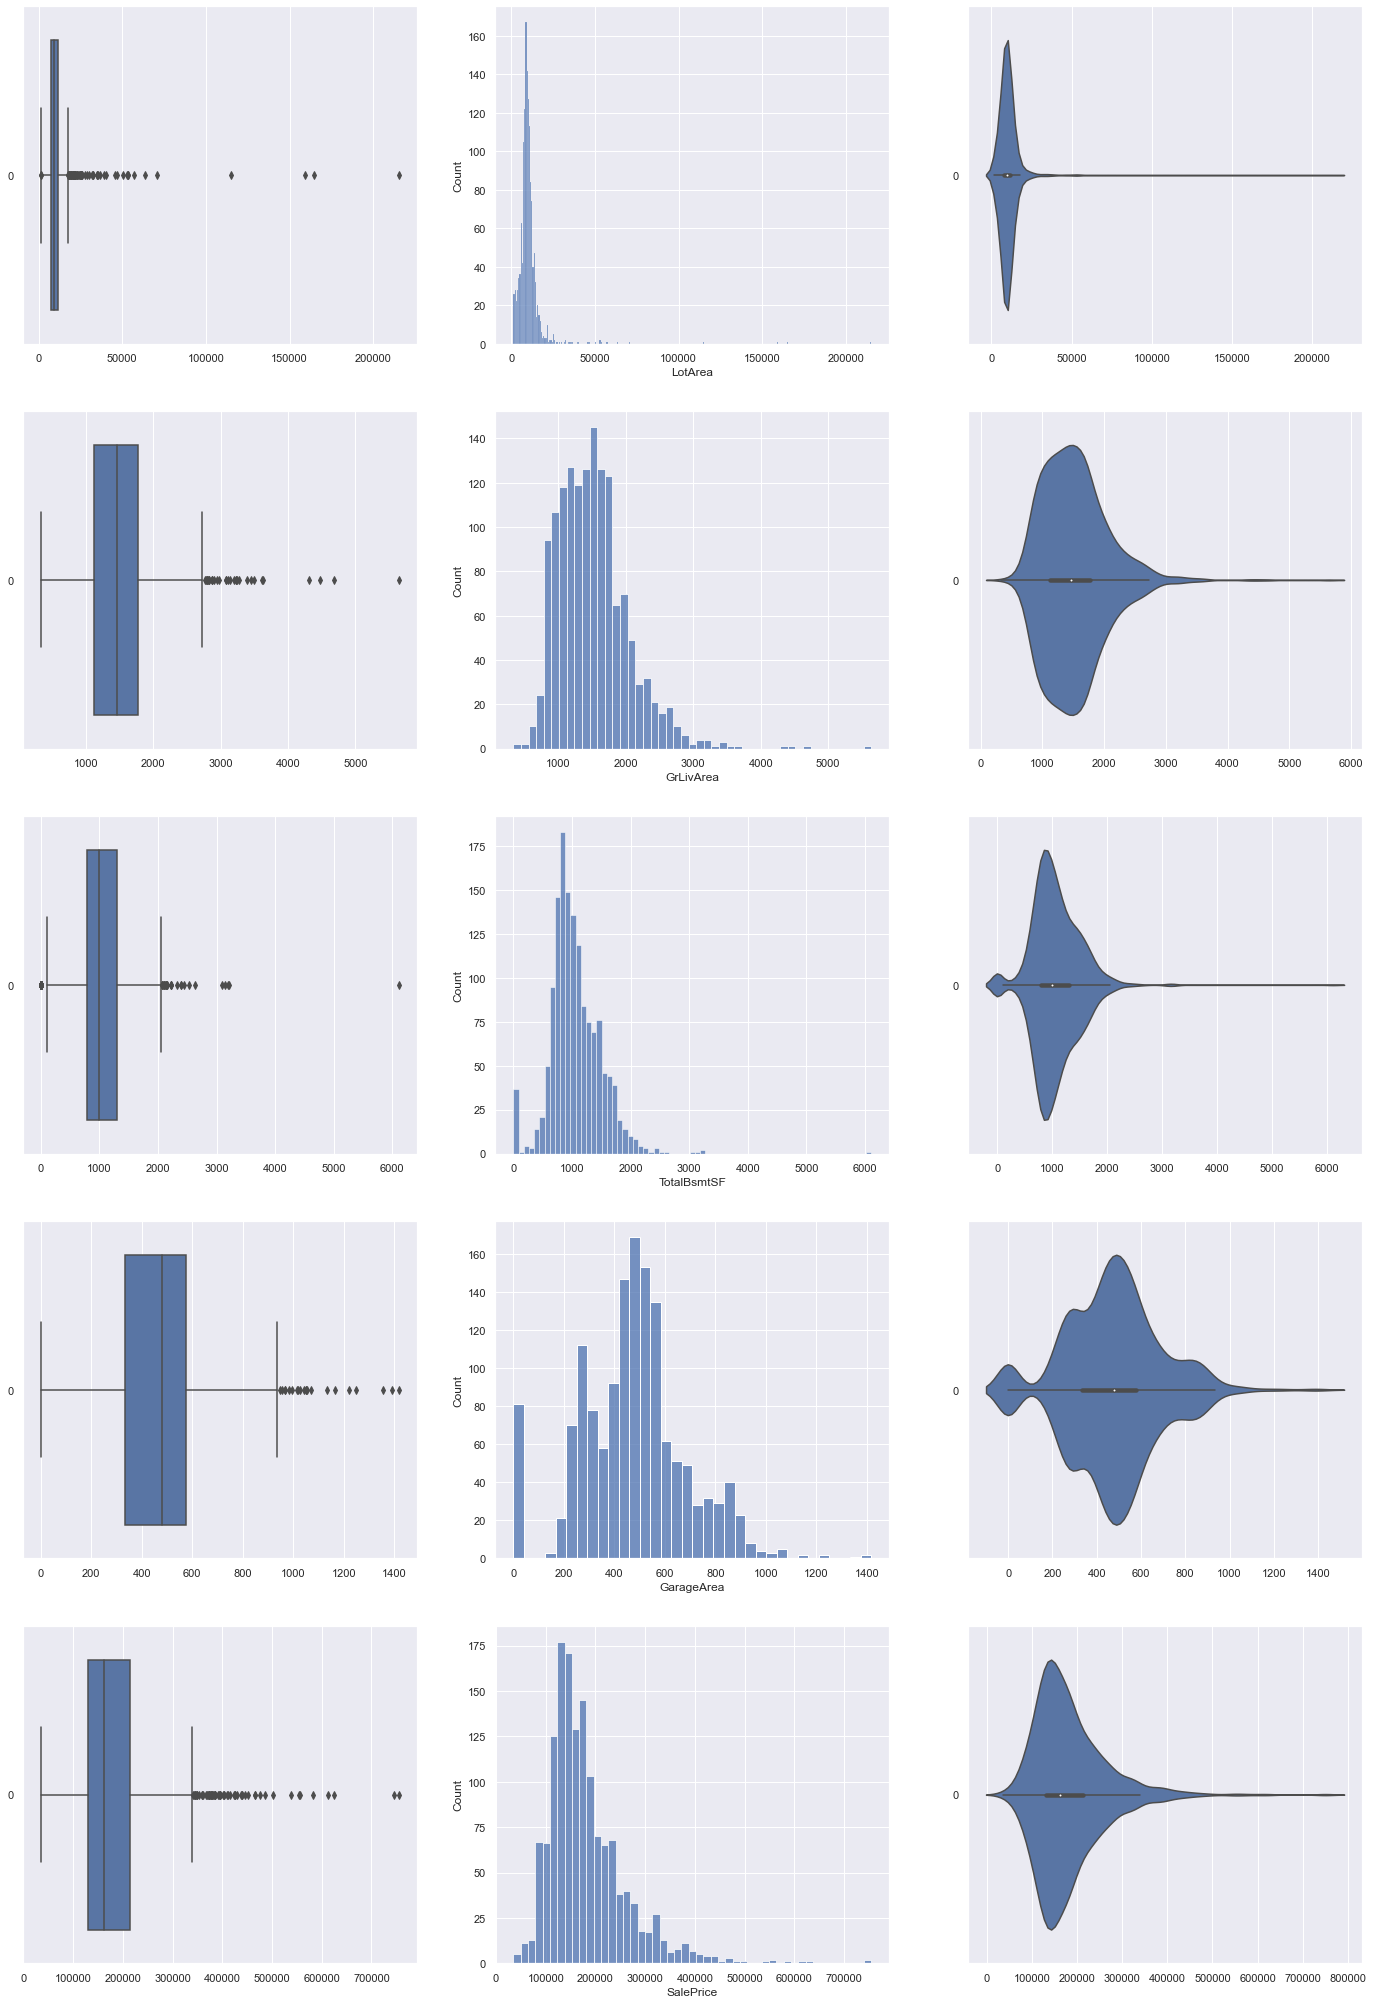

In [96]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(5, 3, figsize=(24, 36))

# Plot the basic uni-variate figures for LotArea, GrLivArea, TotalBsmtSF, GarageArea, SalePrice
count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

### b) GrLivArea Looks to be the closest to a Normal Distribution Curve
- most symmetrical
- least bumps
- most bell looking

### LotArea looks to have the highest outlier

In [97]:
# to see skewness
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [98]:
q1 = houseNumData.quantile(0.25)
q3 = houseNumData.quantile(0.75)
iqr = q3-q1
iqr # inter quartile range

LotArea         4048.00
GrLivArea        647.25
TotalBsmtSF      502.50
GarageArea       241.50
SalePrice      84025.00
dtype: float64

In [99]:
outliers = (houseNumData<(q1-1.5*iqr)) | (houseNumData>(q3+1.5*iqr))
outliers.sum() # sum of outliers

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

In [100]:
# Check the relationship amongst the variables using mutual correlation and the correlation heatmap
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<AxesSubplot:>

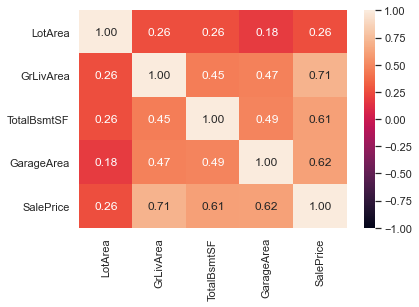

In [101]:
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### c) GrLivArea has the highest correlation with SalePrice with a positive correlation of 0.71

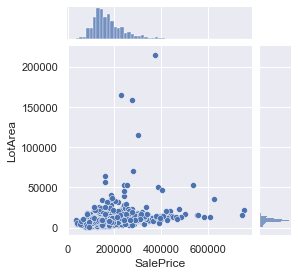

In [102]:
# Check the relationship amongst the variables using mutual jointplots and an overall pairplot
# Jointplot SalePrice with LotArea
jointDF = pd.concat([houseNumData['SalePrice'], houseNumData['LotArea']], axis = 1).reindex(houseNumData['SalePrice'].index)
sb.jointplot(data = jointDF, x = "SalePrice", y = "LotArea", height = 4)

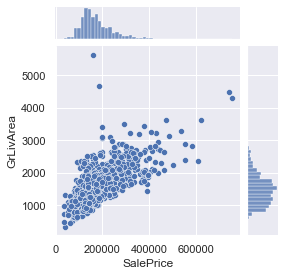

In [103]:
# Jointplot SalePrice with GrLivArea
jointDF = pd.concat([houseNumData['SalePrice'], houseNumData['GrLivArea']], axis = 1).reindex(houseNumData['SalePrice'].index)
sb.jointplot(data = jointDF, x = "SalePrice", y = "GrLivArea", height = 4)

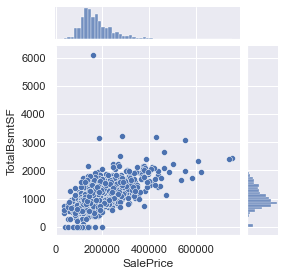

In [104]:
# Jointplot SalePrice with TotalBsmtSF
jointDF = pd.concat([houseNumData['SalePrice'], houseNumData['TotalBsmtSF']], axis = 1).reindex(houseNumData['SalePrice'].index)
sb.jointplot(data = jointDF, x = "SalePrice", y = "TotalBsmtSF", height = 4)

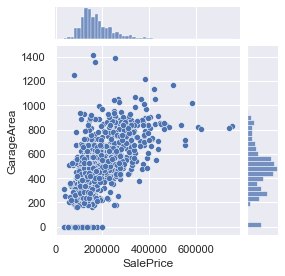

In [105]:
# Jointplot SalePrice with GarageArea
jointDF = pd.concat([houseNumData['SalePrice'], houseNumData['GarageArea']], axis = 1).reindex(houseNumData['SalePrice'].index)
sb.jointplot(data = jointDF, x = "SalePrice", y = "GarageArea", height = 4)

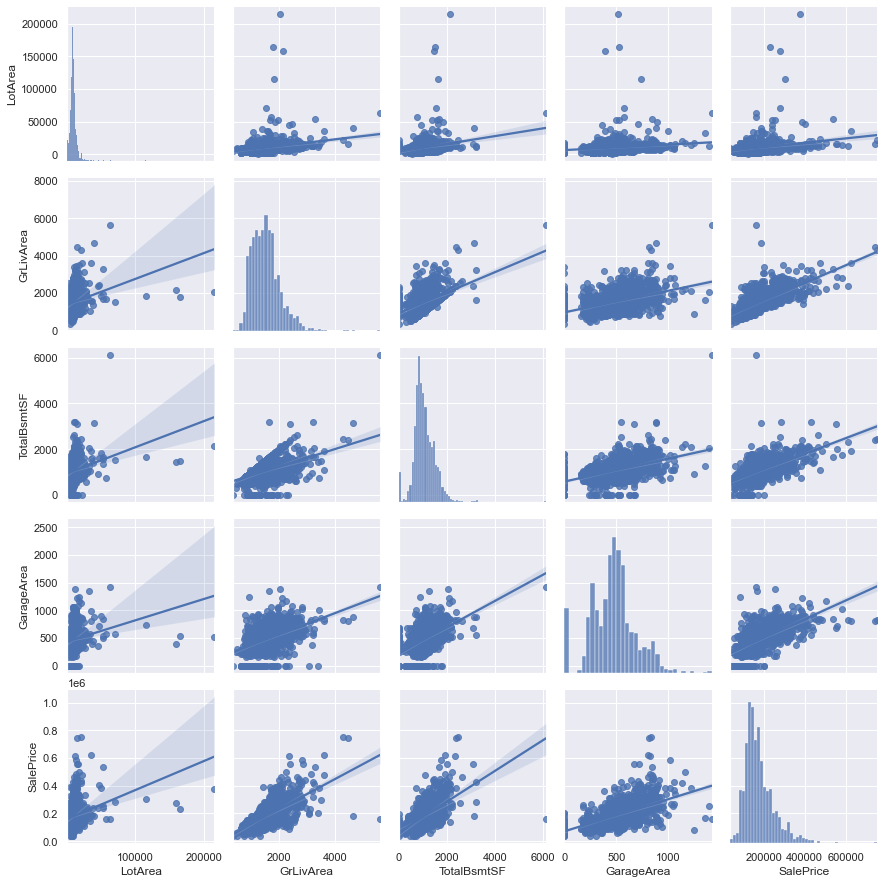

In [106]:
# Overall Pairplot
sb.pairplot(data = houseNumData, kind='reg') # kind='reg' add regression line to plot

### d) It is difficult to tell which has the strongest correlation with SalePrice using Joint/Pair Plots but GrLivArea looks to have a thinner linear line with SalePrice, suggesting the strongest linear relationship

# Question 2

In [107]:
# Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [108]:
for var in houseCatData:
    houseCatData[var] = houseCatData[var].astype('category')
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


In [109]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


Type of Dwelling: 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


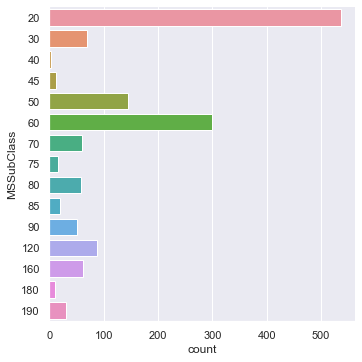

In [110]:
# MSSubClass in the Dataset
print("Type of Dwelling:", len(houseCatData["MSSubClass"].unique()))

# Type of Dwelling in each MSSubClass
print(houseCatData["MSSubClass"].value_counts())
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count")

Physical locations within Ames city limits: 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


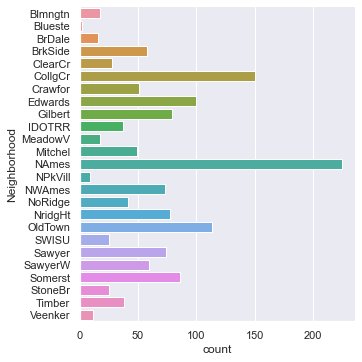

In [111]:
# Neighborhood in the Dataset
print("Physical locations within Ames city limits:", len(houseCatData["Neighborhood"].unique()))

# Physical locations within Ames city limits
print(houseCatData["Neighborhood"].value_counts())
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count")

Type of dwelling: 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


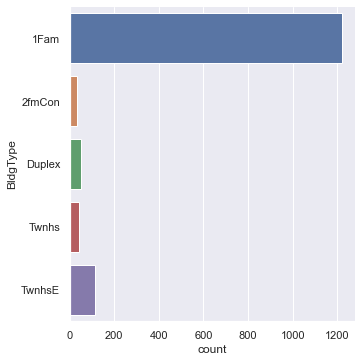

In [112]:
# BldgType in the Dataset
print("Type of dwelling:", len(houseCatData["BldgType"].unique()))

# Type of dwelling
print(houseCatData["BldgType"].value_counts())
sb.catplot(y = "BldgType", data = houseCatData, kind = "count")

Rates the overall material and finish of the house: 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


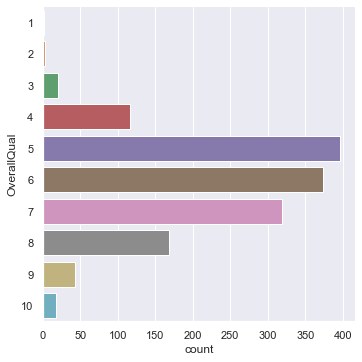

In [113]:
# OverallQual in the Dataset
print("Rates the overall material and finish of the house:", len(houseCatData["OverallQual"].unique()))

# Rates the overall material and finish of the house
print(houseCatData["OverallQual"].value_counts())
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count")

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

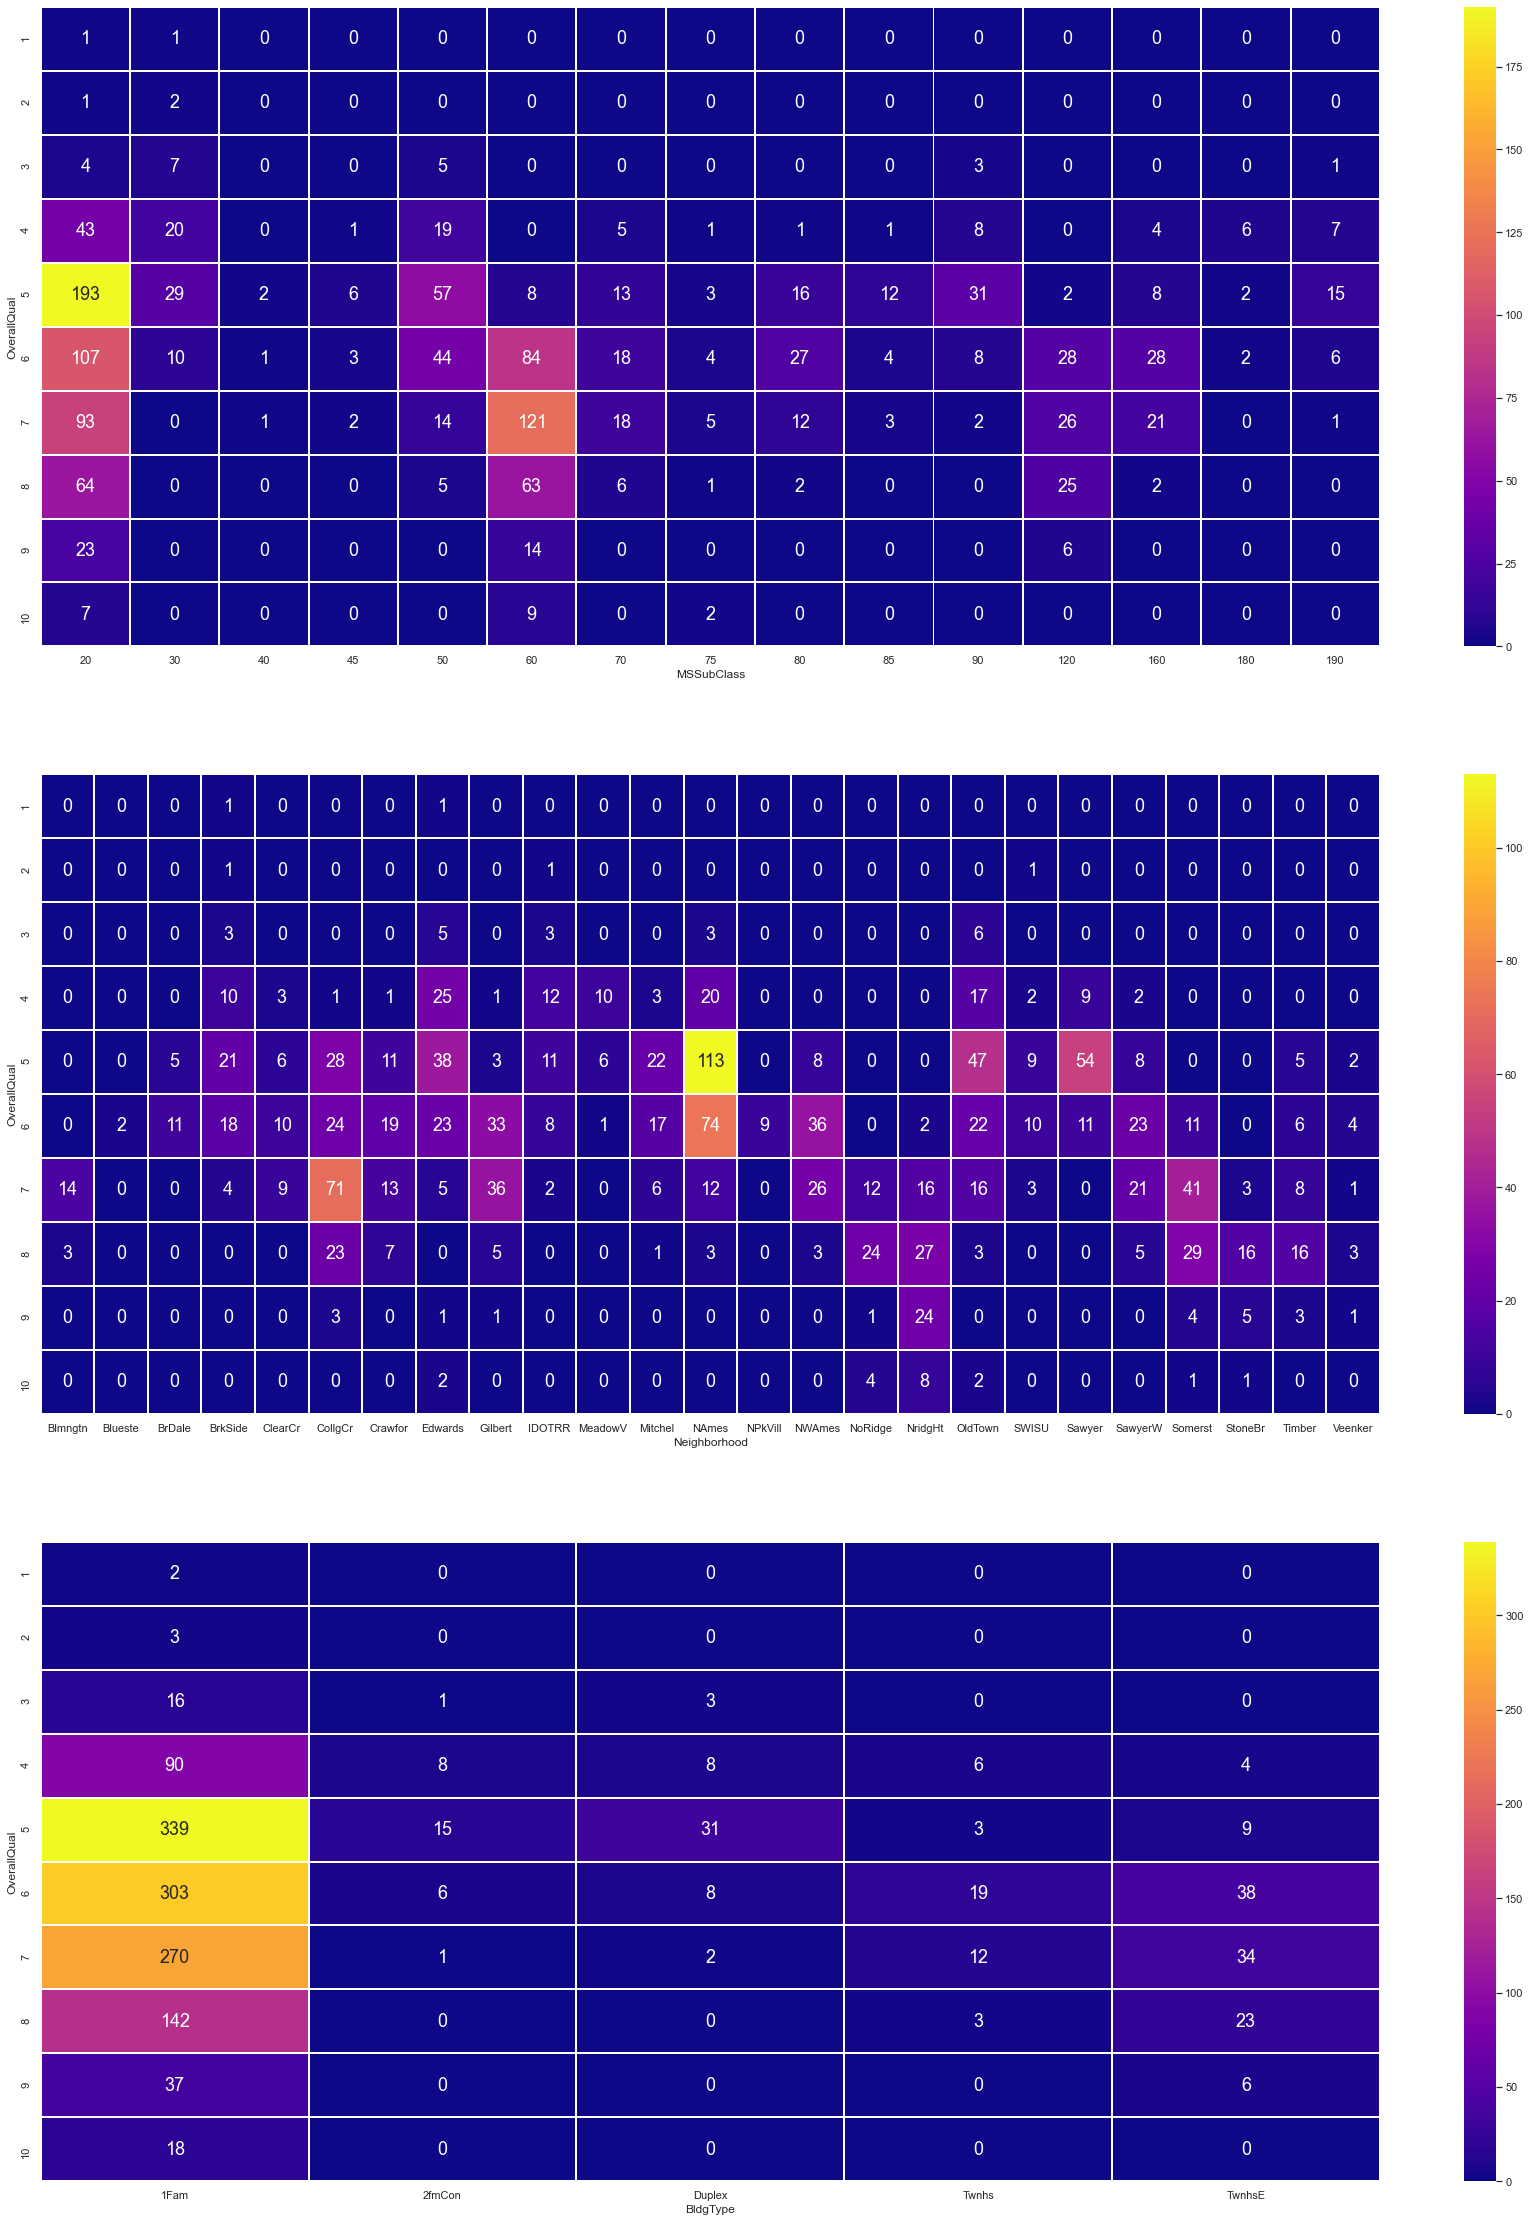

In [114]:
# Distribution of the Two Types over Generations
f, axes = plt.subplots(3, 1, figsize=(30, 40))

# fmt = "0.0f" put in decimal instead of exponent
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "plasma", ax = axes[0], fmt="0.0f")
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "plasma", ax = axes[1], fmt="0.0f")
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "plasma", ax = axes[2], fmt="0.0f")

### c) Between OverallQual & MSSubClass, the data are clustered around:
- MSSubClass(20), OverallQual(5,6)
- MSSubClass(60), OverallQual(7)

### Between OverallQual & Neighbourhood, the data are clustered around:
- Neighbour(NAmes), OverallQual(5)

### Between OverallQual & BldgType, the data are clustered around:
- BldgType(1Fam), OverallQual(5,6,7,8)

### However, can't see any trend here

### There seems to be a increasing trend for OverallQual to SalePrice here

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

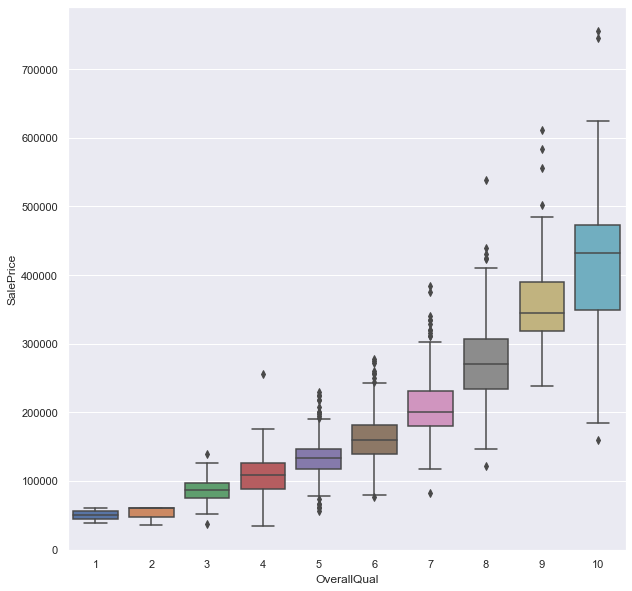

In [115]:
# Box Plot of SalePrice against OverallQual
f, axes = plt.subplots(1, 1, figsize=(10,10))
SalePrice_against_OverallQual = pd.DataFrame(houseData[['SalePrice', 'OverallQual']])
sb.boxplot(x='OverallQual', y='SalePrice', data=SalePrice_against_OverallQual)

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

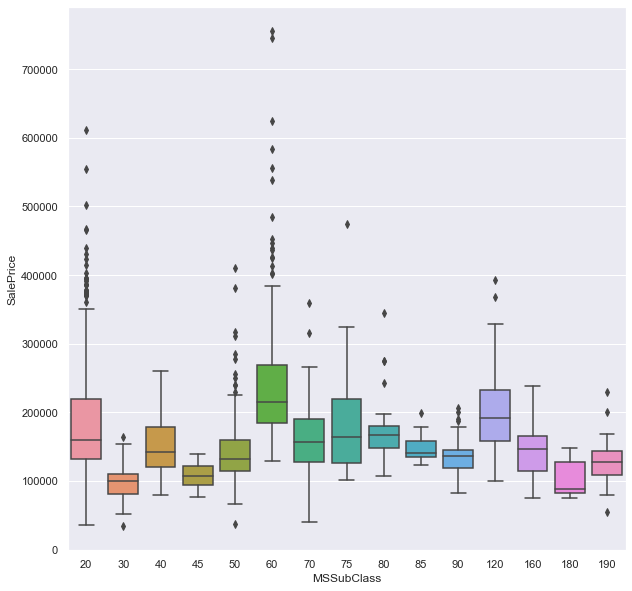

In [116]:
# Box Plot of SalePrice against MSSubClass
f, axes = plt.subplots(1, 1, figsize=(10,10))
SalePrice_against_MSSubClass = pd.DataFrame(houseData[['SalePrice','MSSubClass']])
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = SalePrice_against_MSSubClass)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

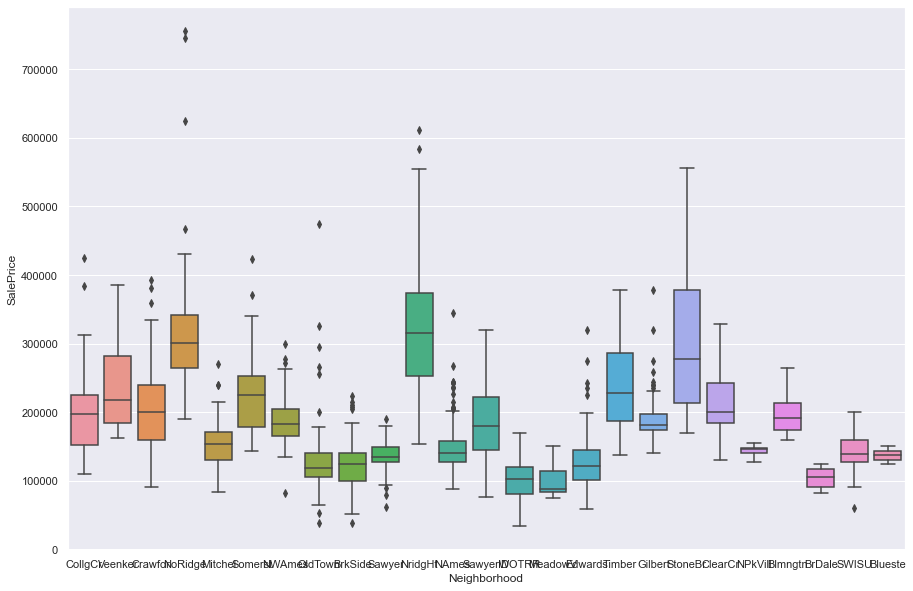

In [117]:
# Box Plot of SalePrice against Neighborhood
f, axes = plt.subplots(1, 1, figsize=(15,10))
SalePrice_against_Neighborhood = pd.DataFrame(houseData[['SalePrice','Neighborhood']])
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = SalePrice_against_Neighborhood)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

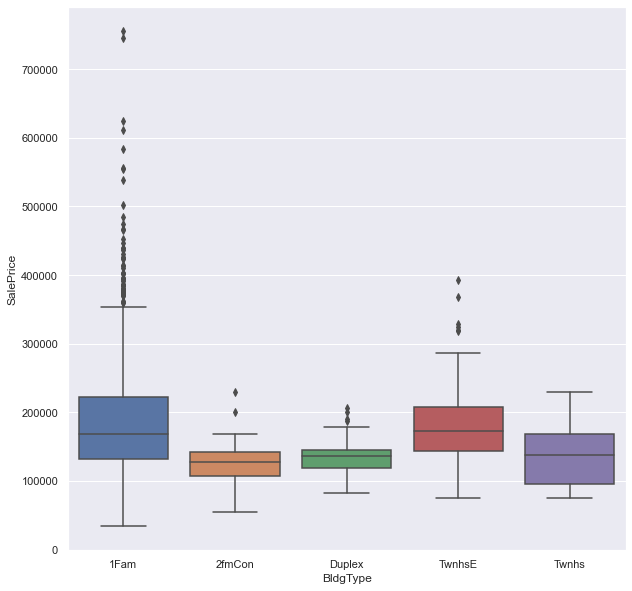

In [118]:
# Box Plot of SalePrice against BldgType
f, axes = plt.subplots(1, 1, figsize=(10,10))
SalePrice_against_BldgType = pd.DataFrame(houseData[['SalePrice','BldgType']])
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = SalePrice_against_BldgType)